# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data File

In [2]:
apo_hb_file  = 'data/hbond_count_apo_D34_D214.dat'
holo_hb_file = 'data/hbond_count_holo_D34_D214.dat' 
apo_fSASA_file  = 'data/fSASA_D34_D214_apo_s11-65.dat'
holo_fSASA_file = 'data/fSASA_D34_D214_holo_s21-42.dat'

# Collect Data

In [3]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [float(dat) for dat in split_line]
                data.append(dat_list)
    return data

In [4]:
apo_hb_data  = data_collect(apo_hb_file)
holo_hb_data = data_collect(holo_hb_file)
apo_fSASA_data  = data_collect(apo_fSASA_file)
holo_fSASA_data = data_collect(holo_fSASA_file) 

# Plot Data Settings

## Colors

In [5]:
Color1 = ('#00FF17') # Green 
Color2 = ('#0069FF') # Blue
Color3 = ('#FF00E8') # Pink 
Color4 = ('#FF9700') # Orange 
Colors = [Color1, Color2, Color3, Color4]

## Global Settings

In [6]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [7]:
ink_x = 1.4 # 1.4
ink_y = 0.9 # 1.4

ink_markersize  = 2
ink_linewidth = 1

# Make Hydrogen Bond Count Plots

## Plot Apo HB Data

### Plot With Labels

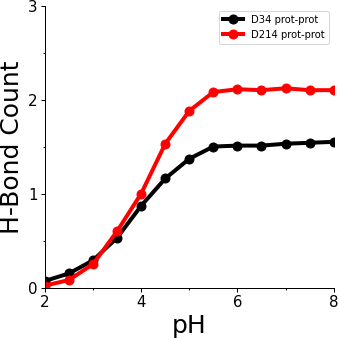

In [8]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_hb_data], [y[1] for y in apo_hb_data], 'o-', color='Black', markersize=9, linewidth=4)
axes.plot([x[0] for x in apo_hb_data], [y[2] for y in apo_hb_data], 'o-', color='Red', markersize=9, linewidth=4)


# plot labels
legend = ['D34 prot-prot', 'D214 prot-prot']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('H-Bond Count', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 3)
axes.set_yticks([0, 1, 2, 3])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plot without labels

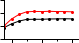

In [9]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_hb_data], [y[1] for y in apo_hb_data], 'o-', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in apo_hb_data], [y[2] for y in apo_hb_data], 'o-', color='red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)



# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 3)
axes.set_yticks([0, 1, 2, 3])
axes.yaxis.set_minor_locator(AutoMinorLocator(1))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(4, 9)
axes.set_xticks([4.5, 6.5, 8.5])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/apo_hb_count.png", dpi=360, transparent=True)
plt.show()

## Plot Holo HB Data

### Plot with Labels

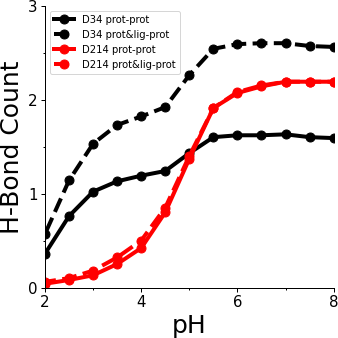

In [10]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in holo_hb_data], [y[1] for y in holo_hb_data], 'o-', color='Black', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_hb_data], [y[2] for y in holo_hb_data], 'o--', color='Black', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_hb_data], [y[3] for y in holo_hb_data], 'o-', color='red', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_hb_data], [y[4] for y in holo_hb_data], 'o--', color='red', markersize=9, linewidth=4)


# plot labels
legend = ['D34 prot-prot', 'D34 prot&lig-prot', 'D214 prot-prot', 'D214 prot&lig-prot']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('H-Bond Count', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 3)
axes.set_yticks([0, 1, 2, 3])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plot without labels

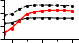

In [11]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in holo_hb_data], [y[1] for y in holo_hb_data], 'o-', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_hb_data], [y[2] for y in holo_hb_data], 'o--', color='Black', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_hb_data], [y[3] for y in holo_hb_data], 'o-', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_hb_data], [y[4] for y in holo_hb_data], 'o--', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)


# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 3)
axes.set_yticks([0, 1, 2, 3])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(4, 9)
axes.set_xticks([4.5, 6.5, 8.5])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/holo_hb_count.png", dpi=360, transparent=True)
plt.show()

# Total Number of Hydrogen Bonds SI Figure.

# Make Water Count Plots

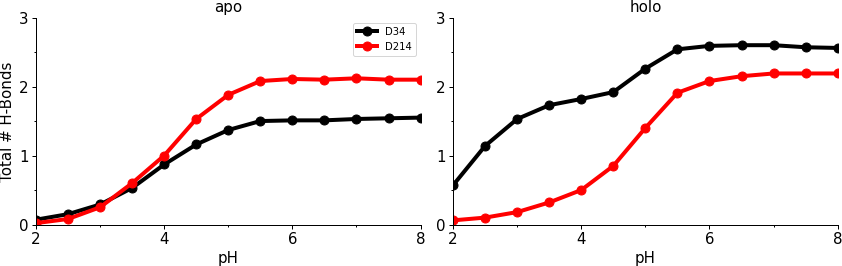

In [12]:
# Fold Cell
plt.close('all')

figcols = 2
figrows = 1

fig, axes = plt.subplots(nrows=figrows, ncols=figcols, figsize=(12, 4))
axes = axes.flatten()

name_list = ['apo', 'holo']
legend = ['D34', 'D214']

for index in range(figcols*figrows):
    #Data
    if index == 0:
        axes[index].plot([x[0] for x in apo_hb_data], [y[1] for y in apo_hb_data], 'o-', color='Black', markersize=9, linewidth=4)
        axes[index].plot([x[0] for x in apo_hb_data], [y[2] for y in apo_hb_data], 'o-', color='Red', markersize=9, linewidth=4)
    if index == 1: 
        #axes[index].plot([x[0] for x in holo_hb_data], [y[1] for y in holo_hb_data], 'o-', color='Black', markersize=9, linewidth=4)
        axes[index].plot([x[0] for x in holo_hb_data], [y[2] for y in holo_hb_data], 'o-', color='Black', markersize=9, linewidth=4)
        #axes[index].plot([x[0] for x in holo_hb_data], [y[3] for y in holo_hb_data], 'o-', color='red', markersize=9, linewidth=4)
        axes[index].plot([x[0] for x in holo_hb_data], [y[4] for y in holo_hb_data], 'o-', color='red', markersize=9, linewidth=4)
                

    #Plot Details
    axes[index].spines['top'].set_visible(False)
    axes[index].spines['right'].set_visible(False)

    axes[index].set_title('{}'.format(name_list[index]), fontsize=15)
    
    # Y-Axis
    if index == 0:
        axes[index].set_ylabel('Total # H-Bonds', fontsize=15)
        axes[index].legend(legend)
        
    axes[index].set_ylim(0, 3)
    axes[index].set_yticks([0, 1, 2, 3])
    axes[index].tick_params(axis='y', labelsize=15)
    axes[index].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelleft=True)

    # X-Axis
    axes[index].set_xlabel('pH', fontsize=15)
    axes[index].set_xlim(2, 8)
    axes[index].set_xticks([2, 4, 6, 8])
    axes[index].tick_params(axis='x', labelsize=15)
    axes[index].xaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelbottom=True)

plt.tight_layout()
plt.savefig('plots/SI_Total_Num_HBs.png', dpi=360)
plt.show()

## Plot fSASA D34

### Plot with Labels

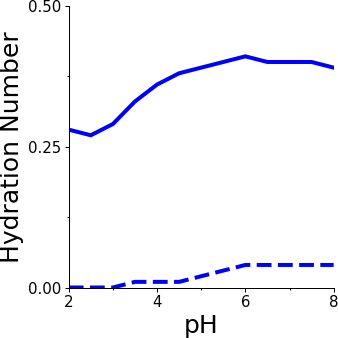

In [13]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_fSASA_data], [y[1] for y in apo_fSASA_data], '-', color='Blue', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_fSASA_data], [y[1] for y in holo_fSASA_data], '--', color='Blue', markersize=9, linewidth=4)



# plot labels
legend = ['D34', 'D214']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('Hydration Number', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 0.5)
axes.set_yticks([0, 0.25, 0.5])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plots without Labels

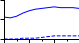

In [14]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_fSASA_data], [y[1] for y in apo_fSASA_data], '-', color='Blue', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_fSASA_data], [y[1] for y in holo_fSASA_data], '--', color='Blue', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)


# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 0.5)
axes.set_yticks([0.0, 0.25, 0.5])
axes.yaxis.set_minor_locator(AutoMinorLocator(1))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/D34_fSASA.png", dpi=360, transparent=True)
plt.show()

## Plot fSASA D214

### Plot with Labels

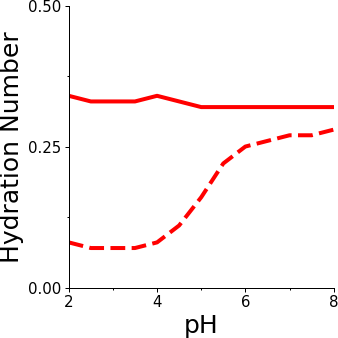

In [15]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_fSASA_data], [y[2] for y in apo_fSASA_data], '-', color='Red', markersize=9, linewidth=4)
axes.plot([x[0] for x in holo_fSASA_data], [y[2] for y in holo_fSASA_data], '--', color='Red', markersize=9, linewidth=4)



# plot labels
legend = ['D34', 'D214']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('Hydration Number', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 0.5)
axes.set_yticks([0, 0.25, 0.5])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plots without Labels

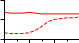

In [16]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in apo_fSASA_data], [y[2] for y in apo_fSASA_data], '-', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
axes.plot([x[0] for x in holo_fSASA_data], [y[2] for y in holo_fSASA_data], '--', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)



# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 0.5)
axes.set_yticks([0, 0.25, 0.5])
axes.yaxis.set_minor_locator(AutoMinorLocator(1))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/D214_fSASA.png", dpi=360, transparent=True)
plt.show()